In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
%matplotlib inline

In [24]:
#df = pd.read_csv("../data/merged_data_clean.csv")
df = pd.read_csv("Data/merged_data_clean.csv")
df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTZ,DBQ095Z,DBD100,DRQSPREP,...,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWSZ
0,109266,2,29,6,5.00,5,3,1.0,1.0,4.0,...,1.423,0.000,0.028,0.004,0.007,0.000,2268.9,2268.9,0.0,1.0
1,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
2,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
3,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
4,109273,1,36,3,0.83,4,3,4.0,NaN,2.0,...,0.328,0.000,0.114,0.005,0.016,0.005,0.0,0.0,0.0,91.0


In [49]:
df["SMQ020"] = df["SMQ020"].astype('category')
print(df["SMQ040"].dtypes)

category


In [53]:
smoke_rate_df = df[["SMQ020","KIQ026"]]
smoke_rate_df

,SMQ020,KIQ026
0,2,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
57433,1,2
57434,1,2
57435,2,2
57436,1,2


C:\Users\tnguy\AppData\Local\Temp\ipykernel_21244\1031919263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoke_rate_df["SMQ020"] = df["SMQ020"].map({1: "Yes", 2: "No", 7: "Refused", 9:"Don't know"})
C:\Users\tnguy\AppData\Local\Temp\ipykernel_21244\1031919263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoke_rate_df["KIQ026"] = df["KIQ026"].map({1: "Yes", 2: "No"})


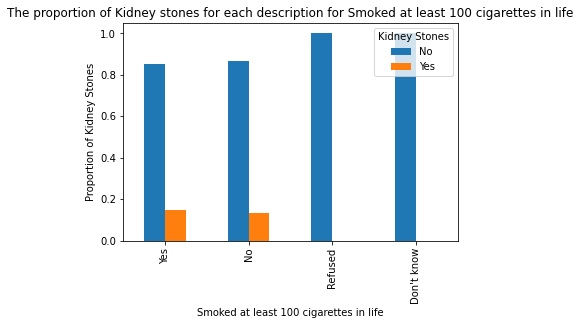

In [59]:
smoke_rate_df["SMQ020"] = df["SMQ020"].map({1: "Yes", 2: "No", 7: "Refused", 9:"Don't know"})
smoke_rate_df["KIQ026"] = df["KIQ026"].map({1: "Yes", 2: "No"})

cross_tab = pd.crosstab(smoke_rate_df["SMQ020"], smoke_rate_df["KIQ026"], normalize='index')
cross_tab.plot(kind='bar', stacked=False)

plt.title("The proportion of Kidney stones for each description for Smoked at least 100 cigarettes in life")
plt.xlabel("Smoked at least 100 cigarettes in life")
plt.ylabel("Proportion of Kidney Stones")
plt.legend(title="Kidney Stones")
plt.show()

